## Learning objectives
- Describe parameters of a regression of where the predictor is a **number**
- Relate regression parameters to the correlation coefficient
- Calculate metrics of a regression model
- Understand why two predictors together in the same model have different slopes than if they are in separate models.

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import bernoulli
sns.set_theme()
from scipy.stats import norm
geno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("gwas_plus_pmap.csv",sep=",")

####

to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "MASC06116": (fruit_length_geno['MASC06116']=='A').astype(int)})
                                                                                    ###^^or *2
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]

to_model = sm.add_constant(to_model)

X = to_model.loc[:,['const','MASC06116']]
y = to_model['fruit_length']
model_marker = sm.OLS(y, X).fit()
model_marker.summary()

What we just learned is sometimes called "ANOVA" but it boils down to the same thing as regression. But regression is more general than ANOVA because we can have numbers as predictors.

### 4.5 Linear regression with a *number* feature as a predictor
But we don't have to use only binary features as predictors. 

Let's make a new model:

   ${mean Fruit Length} = intercept + slope \times height $
   

**Exercise 4.5.1**: Make a scatter plot of fruit length versus height.  What do you think the intercept and slope would be? You can also use `sns.regplot` (regression plot) instead of `sns.relplot` to add a line to the plot

<AxesSubplot:xlabel='height', ylabel='fruit_length'>

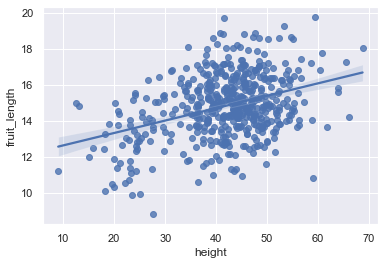

In [9]:
sns.regplot(data=pheno, y='fruit_length',x='height')

In [10]:
0.6/10

0.06

**Exercise 4.5.2**: Run the regression.
1. Create the input data frames and run the regression. Call your new model `model_height`. You may need to get rid of `NA` (missing) values.

In [14]:
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "height": fruit_length_geno['height']})
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]

to_model = sm.add_constant(to_model)

X = to_model.loc[:,['const','height']]
y = to_model['fruit_length']
model_height = sm.OLS(y, X).fit()
model_height.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           fruit_length   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     77.44
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           2.13e-17
Time:                        13:23:31   Log-Likelihood:                -980.16
No. Observations:                 511   AIC:                             1964.
Df Residuals:                     509   BIC:                             1973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9419      0.336     35.532      0.000      11.282      12.602
height         0.0691      0.008      8.800      0.000       0.054       0.085
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.107
Skew:                          -0.030   Prob(JB):                        0.948
Kurtosis:                       2.961   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. What are the meanings of the parameters of the model? Explain it in everyday terms. Write it down:

In [12]:
model_height.params
# params[0] is intercept =
# params[1] is slope = 0.07

const     11.941920
height     0.069106
dtype: float64

3. Plot the predicted values of fruit length as a function of height on top of the true values in a scatter plot, with height on the x axis. Do this by creding predictied values and put it in your to_model data frame. You could to use the real/generated column I showed you how to make before, but this is a bit easier in matplotlib.

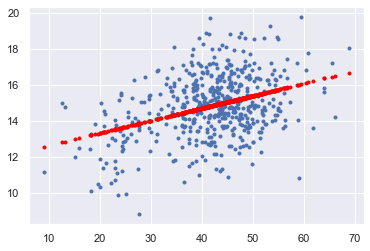

In [17]:
to_model['pred'] = model_height.predict()
f, ax = plt.subplots(1)
ax.plot( to_model['height'], to_model['fruit_length'],'.')
ax.plot( to_model['height'], to_model['pred'],'.', color='red')

The **correlation coefficient** is a number between -1 and +1 that summarizes the relationship between two variables. Values near 0 indicate no relationship. Values nearer 1 indicate a positive relationship (like fruit length and height) and values less than 0 have an inverse relationship. We can calculate the correlation of all columns in a data frame using `corr`:

In [4]:
pheno.corr()

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
bolting_days,1.000000,0.020657,0.190081,-0.314102,0.199622,-0.300998,0.115896,-0.094510
seed_weight,0.020657,1.000000,0.861198,-0.250136,-0.064932,0.271370,-0.084994,0.043456
seed_area,0.190081,0.861198,1.000000,-0.486536,0.008840,0.140160,0.035747,-0.056702
ttl_seedspfruit,-0.314102,-0.250136,-0.486536,1.000000,-0.145372,0.152190,-0.224499,0.501261
branches,0.199622,-0.064932,0.008840,-0.145372,1.000000,-0.144360,0.047236,-0.088763
height,-0.300998,0.271370,0.140160,0.152190,-0.144360,1.000000,-0.155076,0.363397
pc_seeds_aborted,0.115896,-0.084994,0.035747,-0.224499,0.047236,-0.155076,1.000000,-0.108998
fruit_length,-0.094510,0.043456,-0.056702,0.501261,-0.088763,0.363397,-0.108998,1.000000


**Exercise 4.5.3**: Creating a new model
1. Plot one pair of phenotypes that has a negative correlation less than -0.2.

In [19]:
to_model = pd.DataFrame({"seeds":fruit_length_geno['ttl_seedspfruit'],
                         "area": fruit_length_geno['seed_area']})
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]

to_model = sm.add_constant(to_model)

X = to_model.loc[:,['const','seeds']]
y = to_model['area']
model_seeds = sm.OLS(y, X).fit()
model_seeds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     209.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.83e-41
Time:                        13:43:54   Log-Likelihood:                 864.11
No. Observations:                 676   AIC:                            -1724.
Df Residuals:                     674   BIC:                            -1715.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9486      0.015     65.260      0.000       0.920       0.977
seeds         -0.0039      0.000    -14.458      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       19.078   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.260
Skew:                           0.067   Prob(JB):                     1.81e-09
Kurtosis:                       4.188   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. What kind of linear model do you propose? **Predict** the intercept and slope.

3. Create and then run the model. Compare your predicted intercept and slope against what the model gives you.

## 5. Linear regression Model metrics
A **metric** is a formula we calculate using the data + the model to figure out how well the model fits the data

**Question**: what metrics have we discussed so far? 

In [ ]:
model_marker.summary()

### 5.1 Residuals

The difference between our predicted average value of fruit length and the actual value is called the **residual**. You can think of this as the **error** in our prediction... the bigger the difference, the worse we did.

**Exercise 5.1.1**: Get the predictions for `model_marker` and save it in a variable called `predicted values`. Calculate the residuals  of fruit length.  

You can also get this using the attribute `resid`:

In [ ]:
model_marker.resid

**Exercise 5.1.2**: Make a strip plot or violin plot of residuals for plants separated by the 2 values of genotypeNumber (refer to Seaborn docs [here](https://seaborn.pydata.org/generated/seaborn.catplot.html))

The **root mean squared error or RMSE** is a measure of how well your predictions fit the data. It is defined as:
1. square the residuals (*squared error*)
2. get the mean of the squared residuals (*mean squared error*)
3. take the square root of that (*root mean squared error*)

**Exercise 5.1.3**: Calculate Root Mean Squared Error using your predictions.

You can calculate root mean squared error using the `rmse` function, alongside your predicted values as follows:

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse(predicted_values, y)

### 5.2 R-squared

R-squared tells us the percent of variation in the fruit_length that is explained by the model, which we can see is 17% of the variation:

In [ ]:
model_marker.rsquared

In [ ]:
pheno['fruit_length'].var()

**Exercise 5.2.1**: Predict the mean values based on only genotype and intercept and get the variance of these (using `var()`). Divide that by the variance of the fruit_lengths overall to calculate fraction of variance explained. Compare that to the `rsquared`.

**Exercise 5.2.2**: Is height a better predictor of fruit length? How can we use the summaries of the regression model to answer that question? Compare the models in 3 different metrics.

## 6 Regressions with more than 1 predictor
Linear regression uses the maximum likelihood method to build a model of the **dependent variable (aka response)** feature where instead of the mean being a constant number (like 12) the mean of the model depends on the **independent variable (aka predictor)** features (fruit length mean = 12 + 3 * genotypeNumber). The value we expect for the dependent variable *depends* on the value of the independent variables.

We've been just using the first marker in fruit_length_geno to predict fruit_length. Let's try a different marker.

In [ ]:
fruit_length_geno.head()

**Exercise 6.1**: Using a different marker to predict fruit length (Model 2) 
1. Use the marker MASC02863 as a predictor variable and do regression predicting fruit length (save this into a variable called `model2`.

2. Write down the linear model including the coefficients of the model. 

3. Calculate the predicted mean fruit lengths and the RMSE

4. Is this marker a good predictor of fruit length? Why?

But there's no reason we have to pick one. We can use more than one by including it in the data frame `X`.

We will fit a linear model like this one:
    
${mean Fruit Length} = intercept + slope1 \times MASC06116 + slope2 \times MASC02863 $

(where the markers are converted into 0 and 1 as above)    

**Exercise 6.2**: Using both markers (Model 3).
1. Run the regression now including both MASC06116 and MASC02863 as predictors of fruit length  (save this into a variable called `model3`). How can we compare it to the other models?

2. Write out the linear model that includes both markers, including the actual numbers of the parameters (rounded to 2 decimals).

3. There are 4 possible genotypes considering these 2 markers, which is all combinations of A and B at the 2 markers. The values are below in the data frame `genoPairs`. Use the linear model in step 2 (or, if you prefer, the `predict` function) to predict mean fruit lengths for plants in the 4 categories. Add this prediction as a column to the data frame. 

4. Compare the slope parameters for model_marker, model2, and model 3. What do you notice? Add another column to the genoPairs data frame that uses the slope parameters from Model 1 and Model 2, together to make predictions. What do you notice?

### 6.1 Collinearity of two independent variables
When two independent variables have almost the same values, they can't both have a high slope if they are together in the same model. Even if when they have a high slope when they are in separate models.

We can use the `crosstab` function to see what combinations of genotypes are present across the plants.

In [ ]:
pd.crosstab(fruit_length_geno['MASC06116'],
            fruit_length_geno['MASC02863'])

**Exercise 6.1.1**: In your own words describe the relationship between the two markers by looking at this table. 

**Exercise 6.1.2**: Make another model `model4` that has 2 predictors, but now both predictors are the genotype at marker MASC06116 (so we have 2 identical independent variables). Compare the coefficients and r-squared between Model 4 and Model 1. What do you notice?